In [1]:
import numpy as np
import matplotlib.pyplot as plt

def leastSquares(X, Y):
    n = len(X)
    sumXi = np.sum(X)
    sumYi = np.sum(Y)
    sumXiSquared = np.sum(X**2)
    sumXiYi = np.sum(X*Y)
    
    m = (n*sumXiYi - sumXi*sumYi)/(n*sumXiSquared - (sumXi**2))
    c = (sumYi - m*sumXi)/n
    
    return m, c

In [2]:
def residuals(X, y, m, c):
    residuals = y - (m*X + c)
    max_index = np.argmax(np.abs(residuals))
    min_index = np.argmin(np.abs(residuals))
    
    print(f"Slope: {m}, Intercept: {c}")
    print(f"Residuals:\n{residuals}")
    print(f"Maximum Residual: {residuals[max_index]} at ({X[max_index]},{y[max_index]})")
    print(f"Minimum Residual: {residuals[min_index]} at ({X[min_index]},{y[min_index]})")

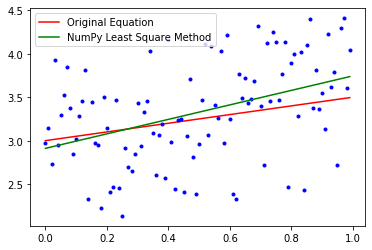

Slope: 0.8340629501612894, Intercept: 2.9111573405971547
Residuals:
[ 6.39909014e-02  2.22085500e-01 -2.02260259e-01  9.90516026e-01
  2.03589607e-04  3.41410836e-01  5.69435055e-01  8.81040431e-01
  4.01731006e-01 -1.35299393e-01  2.73924568e-02  2.77776648e-01
  4.40579345e-01  7.93881204e-01 -7.01048986e-01  4.13409643e-01
 -6.61607121e-02 -1.05689180e-01 -8.37976767e-01  4.33062797e-01
  7.24976795e-02 -6.73178069e-01 -6.26057934e-01  3.65310829e-01
 -6.57191322e-01 -9.86181585e-01 -2.13557743e-01 -4.44093467e-01
 -4.88520910e-01 -3.01526750e-01  2.71190281e-01 -2.26371547e-01
  1.50613123e-01  2.73928919e-01  8.38264938e-01 -1.14588723e-01
 -6.05848587e-01 -1.54456428e-01 -4.09469316e-02 -6.66692585e-01
  9.14479093e-01 -2.74375984e-01 -8.18335666e-01 -2.94590846e-02
 -3.38721726e-02 -8.73509508e-01 -2.41043155e-01  4.03656268e-01
 -4.98081307e-01 -9.32976130e-01 -3.68612737e-01  1.36480915e-01
  7.70285340e-01 -2.84438681e-01  7.26939281e-01  4.19729670e-02
 -1.15389136e-01  6.41

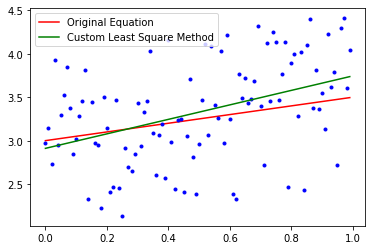

Slope: 0.8340629501612964, Intercept: 2.911157340597151
Residuals:
[ 6.39909014e-02  2.22085500e-01 -2.02260259e-01  9.90516026e-01
  2.03589607e-04  3.41410836e-01  5.69435055e-01  8.81040431e-01
  4.01731006e-01 -1.35299393e-01  2.73924568e-02  2.77776648e-01
  4.40579345e-01  7.93881204e-01 -7.01048986e-01  4.13409643e-01
 -6.61607121e-02 -1.05689180e-01 -8.37976767e-01  4.33062797e-01
  7.24976795e-02 -6.73178069e-01 -6.26057934e-01  3.65310829e-01
 -6.57191322e-01 -9.86181585e-01 -2.13557743e-01 -4.44093467e-01
 -4.88520910e-01 -3.01526750e-01  2.71190281e-01 -2.26371547e-01
  1.50613123e-01  2.73928919e-01  8.38264938e-01 -1.14588723e-01
 -6.05848587e-01 -1.54456428e-01 -4.09469316e-02 -6.66692585e-01
  9.14479093e-01 -2.74375984e-01 -8.18335666e-01 -2.94590846e-02
 -3.38721726e-02 -8.73509508e-01 -2.41043155e-01  4.03656268e-01
 -4.98081307e-01 -9.32976130e-01 -3.68612737e-01  1.36480915e-01
  7.70285340e-01 -2.84438681e-01  7.26939281e-01  4.19729670e-02
 -1.15389136e-01  6.419

In [4]:
X = np.arange(0,1,0.01)
Y = 0.5*X + 3
error = np.random.rand(len(X))*2-1
y = Y + error

A = np.vstack([X, np.ones(len(X))]).T
# Solve using least squares
m, c = leastSquares(X, y)
m_np, c_np = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(X,Y,'r-', label = 'Original Equation')
plt.plot(X, y, 'b.')
plt.plot(X, m_np*X + c_np, 'g-', label = 'NumPy Least Square Method')
plt.legend()
plt.show()
residuals(X, y, m_np, c_np)

plt.plot(X,Y,'r-', label = 'Original Equation')
plt.plot(X, y, 'b.')
plt.plot(X, m*X + c, 'g-', label = 'Custom Least Square Method')
plt.legend()
plt.show()
residuals(X, y, m, c)

### My custom least square method is identical to the NumPy version